### DATA CLEANING & PREPROCESSING (1 - 15)

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

In [3]:
# 1. Load the dataset into a Pandas DataFrame and display the first 5 rows.

#loading the csv file
df= pd.read_csv(r'C:\Users\Loryne\Documents\LUXDEVHQ-LoryneJoy\DATA_SCIENCE\MACHINE-LEARNING\Projects_Machine_Learning\LINEAR_REGRESSION_TEST\cardekho.csv')

# to display the first 5 rows
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


 #### Explain what each column means in your own words.
- name - the brand and model of the car
- year - the year the car was manufactured
- selling_price - The price (in Rupees) at which the car is being sold.
- km_driven - Total kilometers the car has been driven (mileage used).
- fuel - Type of fuel the car uses (e.g., Petrol, Diesel, CNG, LPG).
- seller_type - Who is selling the car (e.g., Individual, Dealer, Trustmark Dealer).t
- transmission - The type of gear system: Manual or Automatic.

In [4]:
# 2. check for missing values in the dataset. Show both the number of missing values per column and the percentage.

missing = df.isnull().sum()

#to get %
percentage_missing = round((missing/len(df))*100,2)

#creating a dictionary
data_dict = {"missing_values_counts": missing,
             "missing_values_percentage": percentage_missing}


#dataframe for missing values
missing_df = pd.DataFrame(data_dict)
missing_df


,missing_values_counts,missing_values_percentage
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [5]:
#3. Drop any rows where the target variable (selling price) is missing.

#dropping rows where target variable is missng
df['selling_price'].isnull().sum()

#to drop rows with missing values
df.dropna(subset=["selling_price"], inplace= True)


#### # Explain why we can’t train a model with missing target values.
- We can’t train a model with missing target values because the target is the answer the model is supposed to learn from. Without it, the model has nothing to compare its guesses against — it’s like trying to study without ever seeing the marking scheme. If you try to train with missing target values, the model will basically be producing random patterns (noise), instead of real learning.

In [6]:
# 4. Fill missing values in the “mileage” column with the column’s mean.
df["mileage(km/ltr/kg)"] = df["mileage(km/ltr/kg)"].fillna(df["mileage(km/ltr/kg)"].mean())
df.isnull().sum()


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                221
max_power             215
seats                 221
dtype: int64

#### Explain why filling missing values can sometimes be better than dropping rows.
- Filling missing values can be better than dropping rows because when you drop rows, you lose data — and sometimes that data is valuable. 
If too many rows are removed, the model has less to learn from. By filling (with measures of central tendency, bfill etc), you keep more information and give the model a fuller picture to learn patterns from.

In [7]:
# to show a summary of the entire dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


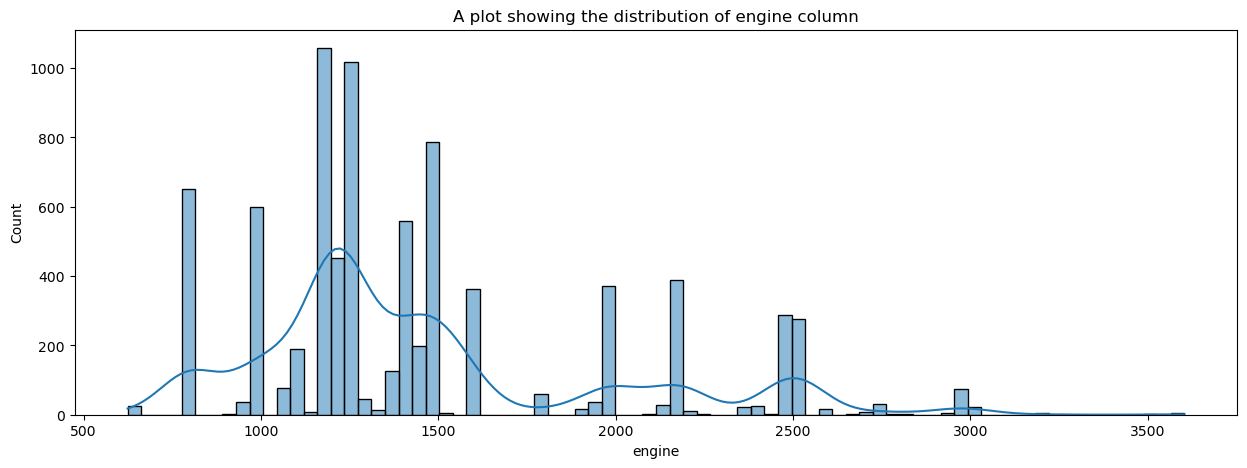

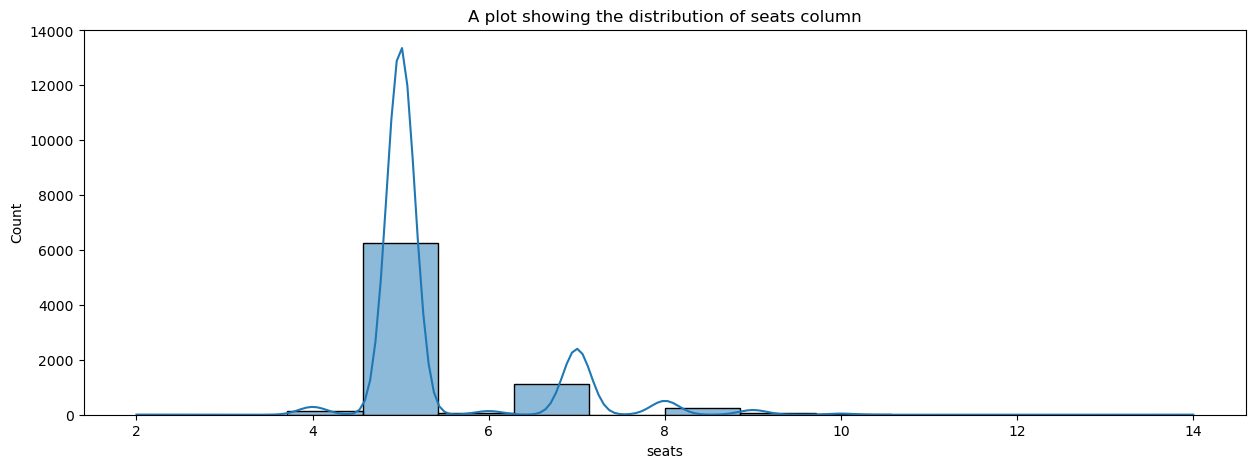

In [8]:
# to visualize engine and seats column to see if the data is symetric or not
missing_columns = ["engine", "seats"]
for col in missing_columns:
    plt.figure(figsize=(15, 5)) #seting size of our figure length n width
    sns.histplot(df, x=df[col], kde= True) # to check if distribution is skewed or not
    plt.title(f"A plot showing the distribution of {col} column")
    plt.xlabel(col)

### as from the plotting above, they are skewed, thus we will use the median to fill their missing values to fill with values of center of data to balance the skewness

In [9]:
#filling the missing values with the median
for col in missing_columns:
    df[col]=df[col].fillna(df[col].median())
    print(f"Fill the missing values for: {col}")
    print("*"*100)

df.isnull().sum()

Fill the missing values for: engine
****************************************************************************************************
Fill the missing values for: seats
****************************************************************************************************


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [10]:
#to get mode of maxpower column
med = df["max_power"].mode()
print (med)

0    74
Name: max_power, dtype: object


In [11]:
# to remove quotation marks in the columns
df["max_power"] = df["max_power"].str.strip("'\"")

In [12]:
df["max_power"].unique()

array(['74', '103.52', '78', '90', '88.2', '81.86', '57.5', '37', '67.1',
       '68.1', '108.45', '60', '73.9', nan, '67', '82', '88.5', '46.3',
       '88.73', '64.1', '98.6', '88.8', '83.81', '83.1', '47.3', '73.8',
       '34.2', '35', '81.83', '40.3', '121.3', '138.03', '160.77',
       '117.3', '116.3', '83.14', '67.05', '168.5', '100', '120.7',
       '98.63', '175.56', '103.25', '171.5', '100.6', '174.33', '187.74',
       '170', '78.9', '88.76', '86.8', '108.495', '108.62', '93.7',
       '103.6', '98.59', '189', '67.04', '68.05', '58.2', '82.85', '81.8',
       '73', '120', '94.68', '160', '65', '155', '69.01', '126.32',
       '138.1', '83.8', '126.2', '98.96', '62.1', '86.7', '188', '214.56',
       '177', '280', '148.31', '254.79', '190', '177.46', '204', '141',
       '117.6', '241.4', '282', '150', '147.5', '108.5', '103.5', '183',
       '181.04', '157.7', '164.7', '91.1', '400', '68', '75', '85.8',
       '87.2', '53', '118', '103.2', '83', '84', '58.16', '147.94',
   

In [13]:
#using replace
df["max_power"].replace(['',"nan"," ","None"], np.nan, inplace=True)

C:\Users\Loryne\AppData\Local\Temp\ipykernel_9848\4051161090.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["max_power"].replace(['',"nan"," ","None"], np.nan, inplace=True)


In [14]:
df["max_power"]=pd.to_numeric(df["max_power"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              8128 non-null   float64
 10  max_power           7912 non-null   float64
 11  seats               8128 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB


In [16]:
#to fill maxpower with median
med = df["max_power"].median()
print (med)

82.0


In [17]:
#4. Fill missing values in the “mileage” column with the column’s mean.
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(df['mileage(km/ltr/kg)'].mean())

df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             216
seats                   0
dtype: int64

In [18]:
# To fill missing numbers with 
df["max_power"]=df["max_power"].fillna(df["max_power"].median())

In [19]:
# 5. Remove duplicate rows from the dataset.
# check the duplicate rows
df.duplicated().sum()


1202

In [20]:
# to remove the duplicates seen
df = df.drop_duplicates()

In [21]:
# to confirm there are no duplicates remaining
df.duplicated().sum()

0

#### Explain how duplicate rows can affect model training.
Duplicate rows can mislead a model because they repeat the same information, making the model think those patterns are more important than they really are. This can cause bias in training and reduce the model’s ability to generalize to new data.

In [22]:
# 6. Convert the “year” column into the car’s age.

df["car_age"]= (2025-df["year"])
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [23]:
# 7. Check the unique values in the “fuel type” column.
df["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

#### Explain why knowing all possible values in a categorical column is important before encoding.
Knowing all possible values in a categorical column is important because if you miss some categories before encoding, the model won’t know how to handle them. This can lead to errors or wrong predictions when new/unseen categories show up. This means that you need the full list so every category is properly represented in the encoded data.

In [24]:
# 8. Replace inconsistent values in the “transmission” column.

df["transmission"]= df["transmission"].str.capitalize()
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


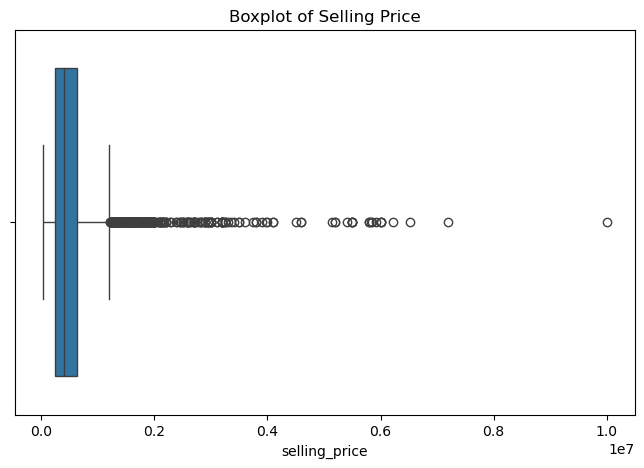

In [25]:
#9. Check if there are any outliers in the “selling price” column using a boxplot.
# Create a boxplot for the "price" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["selling_price"])
plt.title("Boxplot of Selling Price")
plt.xlabel("selling_price")
plt.show()

#### Boxplot interpretation/observation
- The plot is heavily skewed to the left, which is also known as negatively skewed.
The large number of outliers and the very narrow box confirm the initial observation that the data is highly skewed. Most of the selling prices are concentrated at the lower end of the scale, with a few exceptionally high prices pulling the mean to the right.

#### Explain why outliers can affect model accuracy.
- Outliers are extreme values in a dataset that differ significantly from most other data points. They can affect model accuracy because many machine learning models, especially those based on averages or distances (like linear regression or k-nearest neighbors), assume that data follows a typical pattern.
- If outliers exist:
-- They can skew the mean: For example, in linear regression, outliers can pull the line of best fit away from the majority of data points, leading to poor predictions.
They increase error: Models may try to fit the outlier points, which increases overall prediction error on normal data.
They affect variance: Outliers make the data appear more spread out, which can confuse models that rely on variance or standard deviation.
- outliers can mislead the model, causing it to perform worse on normal data and reducing overall accuracy.

In [26]:
#10. # Remove cars priced below 10,000 or above 5,000,000
df_cleaned = df[(df["selling_price"] >= 10000) & (df["selling_price"] <= 5000000)]

# Check the shape before and after cleaning
print("Original dataset size:", df.shape)
print("Cleaned dataset size:", df_cleaned.shape)
 
#Verify no values are outside the desired range
print(df_cleaned["selling_price"].describe())

Original dataset size: (6926, 13)
Cleaned dataset size: (6906, 13)
count    6.906000e+03
mean     5.013782e+05
std      4.247149e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.300000e+05
max      4.600000e+06
Name: selling_price, dtype: float64


####  Explain why setting realistic price limits can help improve model performance.
Setting realistic price limits helps improve model performance because it prevents the model from being influenced by extreme or impossible values that don’t reflect normal market behavior.

- Reduces noise: Very high or very low prices can distort patterns in the data.

- Improves predictions: The model focuses on the range of prices that actually make sense, making its estimates more accurate.

- Prevents overfitting: Out-of-range prices can cause the model to try to fit unusual cases, which hurts performance on typical data.

In short, realistic price limits keep the data clean and meaningful, helping the model learn true patterns.

In [27]:
#11. Standardize the column names 
# so they are all lowercase and contain underscores instead of spaces.

# Standardize column names: lowercase and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(" ", "_")

# Check the updated column names
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18


In [28]:
#to change mileage title
df= df.rename(columns={'mileage(km/ltr/kg)':'mileage'})

In [29]:
# 12. Check if any numerical columns are stored as strings and convert them to numbers.
# To check if any numerical columns are stored as strings
df.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
car_age            int64
dtype: object

In [30]:
# to turn max power column from object to float
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce')


In [31]:
#13. Create a new column for “price per kilometer” by dividing the selling price by the mileage.
#to create a new column
df["priceperkilometer"]= df['selling_price']/df['mileage']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,priceperkilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [32]:
# 14. To ensure the dataset index is properly reset after cleaning.
df = df.reset_index(drop=True)

# Verify changes
print(df.index)

# to show the first 5 rows
df.head()

RangeIndex(start=0, stop=6926, step=1)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age,priceperkilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,11,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,11,17502.365184
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,19,8926.553672
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,15,9782.608696
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,18,8074.534161


In [33]:
# 15. Save your cleaned dataset as a new CSV file called cleaned_cars.csv.

# Save the cleaned dataset to a new CSV file
df.to_csv("cleaned_cars.csv", index=False)

print("Cleaned dataset saved as 'cleaned_cars.csv'")

Cleaned dataset saved as 'cleaned_cars.csv'


### Exploratory Data Analysis (EDA) (16–30)

In [34]:
# 16. Find the average selling price of cars in the dataset.
avg_selling_price = df['selling_price'].mean()
print(avg_selling_price)

517270.6784579844


In [35]:
# 17. Find the most common fuel type in the dataset.
most_common_fuel = df['fuel'].value_counts().idxmax()
print(most_common_fuel)

Diesel


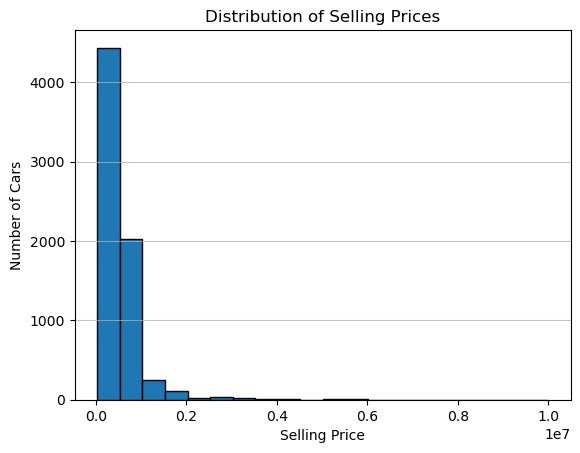

In [36]:
# 18. Plot a histogram of the selling prices
# Make sure selling_price is numeric
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")

# Plot histogram
plt.hist(df["selling_price"], bins=20, edgecolor="black")
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Number of Cars")
plt.grid(axis="y", alpha=0.75)
plt.show()

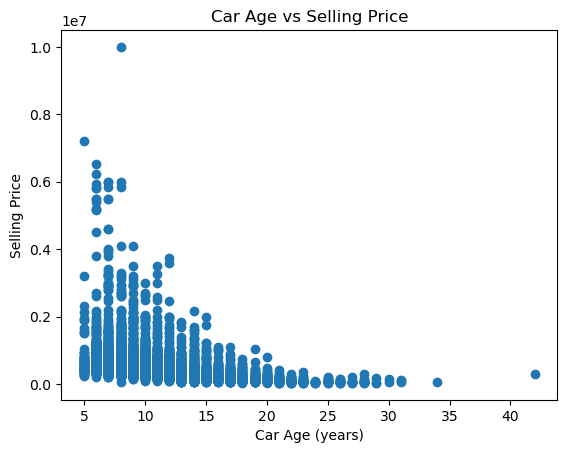

In [37]:
# 19. Plot the relationship between car age and selling price using a scatter plot.
plt.scatter(df['car_age'], df['selling_price'])
plt.xlabel("Car Age (years)")
plt.ylabel("Selling Price")
plt.title("Car Age vs Selling Price")
plt.show()

In [38]:
# 20.  Group cars by fuel type and find the average selling price for each group.
avg_price_by_fuel = df.groupby('fuel')['selling_price'].mean()

print(avg_price_by_fuel)

fuel
CNG       300499.946429
Diesel    639727.768842
LPG       200421.052632
Petrol    375688.966526
Name: selling_price, dtype: float64


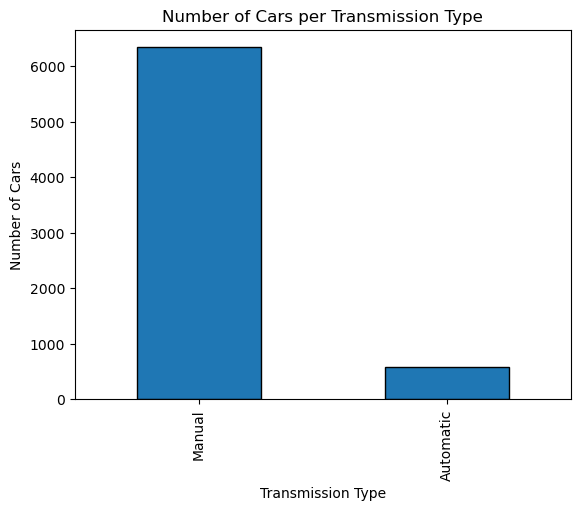

In [39]:
# 21. Plot a bar chart showing the number of cars per transmission type.
transmission_counts = df['transmission'].value_counts()

transmission_counts.plot(kind='bar',edgecolor ='black')
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.title("Number of Cars per Transmission Type")
plt.show()

In [40]:
# 22. Find the car with the highest mileage in the dataset.
highest_mileage_row = df.loc[df['mileage'].idxmax()]
car_name = highest_mileage_row['name']
mileage = highest_mileage_row['mileage']
print(car_name)

Volvo XC90 T8 Excellence BSIV


In [41]:
# 23. Calculate the correlation between mileage and selling price.
correlation = df['mileage'].corr(df['selling_price'])
print(f"Correlation between mileage and selling price: {correlation}")

Correlation between mileage and selling price: -0.10728200874810075


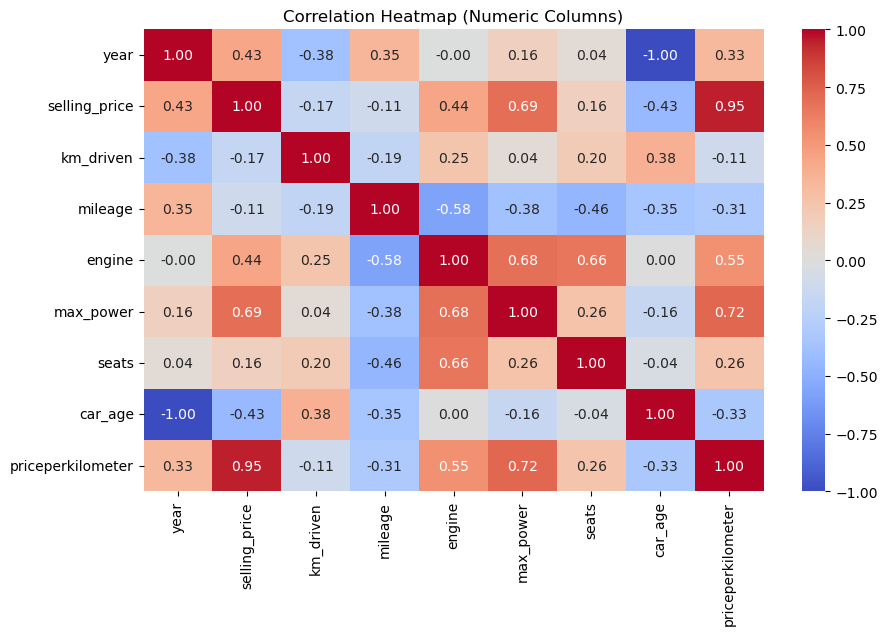

In [42]:
# 24. Plot a heatmap showing the correlations between all numeric columns.
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns)")
plt.show()

transmission
Automatic    1.309712e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


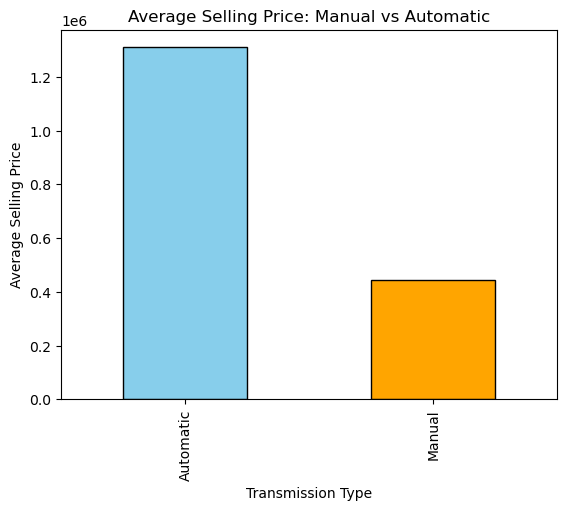

In [43]:
# 25. Check if manual cars are generally cheaper or more expensive than automatic cars.
avg_price_by_transmission = df.groupby('transmission')['selling_price'].mean()

print(avg_price_by_transmission)
avg_price_by_transmission.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')
plt.xlabel("Transmission Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price: Manual vs Automatic")
plt.show()

In [44]:
# 26. Find the average selling price for each year of manufacture.
yearly_avg_price = df.groupby('year')['selling_price'].mean()
print(yearly_avg_price)

year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
2002     99153.807692
2003     97034.021277
2004    109364.250000
2005    137994.494505
2006    164383.308943
2007    174894.505682
2008    208397.639024
2009    227691.620833
2010    273897.334211
2011    318335.696751
2012    351387.379139
2013    451501.724199
2014    511858.798623
2015    589177.625551
2016    653180.339105
2017    732419.517327
2018    866376.613487
2019    949668.547550
2020    888349.158730
Name: selling_price, dtype: float64


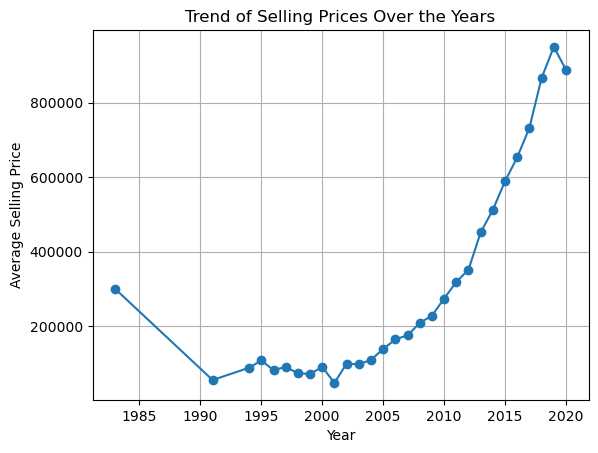

In [45]:
# 27. Plot a line chart showing the trend of selling prices over the years.
plt.plot(yearly_avg_price.index, yearly_avg_price.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Average Selling Price")
plt.title("Trend of Selling Prices Over the Years")
plt.grid(True)
plt.show()

In [46]:
# 28. Find the most expensive car for each fuel type.
idx = df.groupby('fuel')['name'].idxmax()
most_expensive_cars = df.loc[idx, ['fuel', 'name', 'selling_price']]
print(most_expensive_cars)

        fuel                            name  selling_price
2521     CNG     Tata Indica V2 Emax CNG GLX         155000
6474  Diesel  Volvo XC60 Inscription D5 BSIV        5500000
90       LPG     Maruti Wagon R LXI LPG BSIV         225000
170   Petrol   Volvo XC90 T8 Excellence BSIV       10000000


In [47]:
# 29. Find out which brand appears most frequently in the dataset.
df['brand'] = df['name'].str.split().str[0]
most_common_brand = df['brand'].value_counts().idxmax()
count = df['brand'].value_counts().max()
print(most_common_brand)
print(count)

Maruti
2165


In [48]:
# 30. Check the top 5 most common combinations of fuel type and transmission.
top_combinations = (
    df.groupby(['fuel', 'transmission'])
    .size()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
    .head(5)
)

print(top_combinations)

     fuel transmission  Count
2  Diesel       Manual   3457
5  Petrol       Manual   2791
1  Diesel    Automatic    298
4  Petrol    Automatic    286
0     CNG       Manual     56


### Machine Learning (31–40)

In [49]:
df.dtypes

name                  object
year                   int64
selling_price          int64
km_driven              int64
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine               float64
max_power            float64
seats                float64
car_age                int64
priceperkilometer    float64
brand                 object
dtype: object

#### 31. What are the main assumptions of Linear Regression, and how can you check them using this dataset? Explain the assumptions (Linearity, Homoscedasticity, Normality of residuals, No multicollinearity, Independence of errors).
 When we use Linear Regression, there are some key assumptions we need to check to make sure the model is valid. Here are the main ones, and how I would check them with a dataset:

Linearity 

Meaning: The relationship between the independent variables (features) and the dependent variable (target) should be roughly a straight line.

How to check: Plot scatterplots of features vs. the target or look at a residuals vs. fitted values plot. If the points look random (no curve shape), linearity is fine.

Homoscedasticity 

Meaning: The spread (variance) of the residuals should be constant across all levels of the predicted values.

How to check: Again, plot residuals vs. predicted values. If the residuals fan out (like a cone shape), it means heteroscedasticity (bad). A flat random cloud is good.

Normality of Residuals 

Meaning: The residuals (errors) should follow a normal distribution, especially if we want to use regression for hypothesis testing or confidence intervals.

How to check: Use a histogram or Q-Q plot of residuals. If they look bell-shaped or follow the 45-degree line on a Q-Q plot, the assumption is okay.

No Multicollinearity 

Meaning: The independent variables should not be too highly correlated with each other, because that makes it hard to tell which variable is really affecting the target.

How to check: Look at the correlation matrix of the features or calculate the Variance Inflation Factor (VIF). A VIF > 10 is usually a red flag.

Independence of Errors 

Meaning: The residuals (errors) should not be correlated with each other. Each error should be independent of the others.

How to check: For time-series data, plot residuals over time or use the Durbin-Watson test. If the errors show patterns (like trends or cycles), independence is violated.

In summary, Linear Regression assumes the data has a straight-line relationship, errors are evenly spread and independent, the residuals look normal, and the features aren’t duplicating each other’s work. I’d use plots (residual vs. fitted, Q-Q plot, correlation matrix).

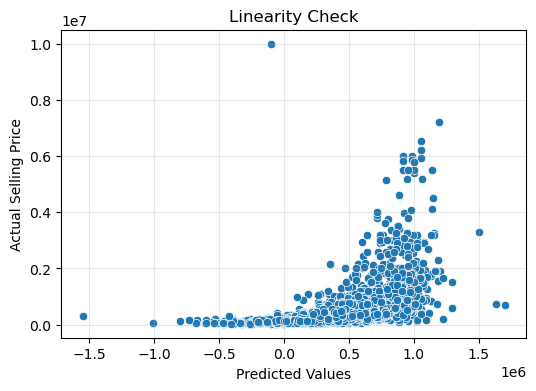

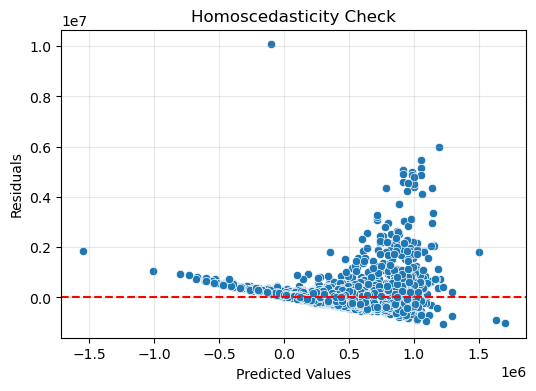

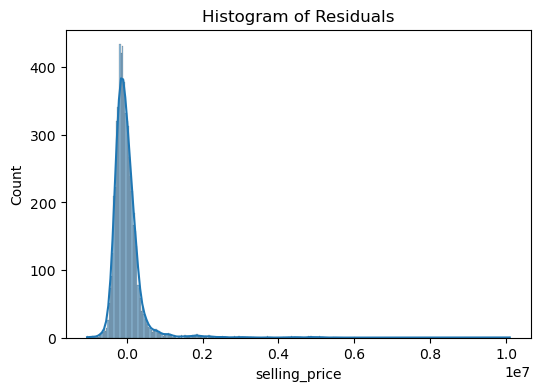

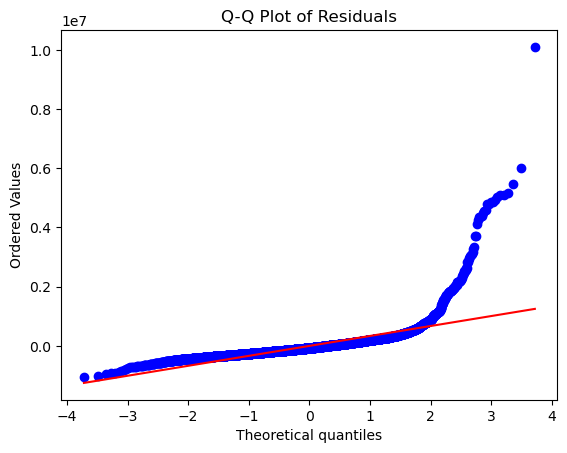

Shapiro-Wilk p-value: 7.46615589052458e-85


c:\Users\Loryne\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6926.
  res = hypotest_fun_out(*samples, **kwds)


In [50]:
# 31. Write code to verify at least three of these assumptions using visualizations or statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import shapiro, probplot
import numpy as np

# Ensure numeric
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce")
df["year"] = pd.to_numeric(df["year"], errors="coerce")

# Drop missing values
df_clean = df.dropna(subset=["selling_price", "mileage", "year"])

# Features and target
X = df_clean[["mileage", "year"]]
y = df_clean["selling_price"]

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predictions & residuals
predictions = model.predict(X)
residuals = y - predictions

# 1. Linearity check
plt.figure(figsize=(6,4))
sns.scatterplot(x=predictions, y=y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Selling Price")
plt.title("Linearity Check")
plt.grid(True, alpha=0.3)
plt.show()

# 2. Homoscedasticity check
plt.figure(figsize=(6,4))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.grid(True, alpha=0.3)
plt.show()

# 3. Normality check
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)


In [51]:
# 32. Train a Linear Regression model to predict the car’s selling price using selected features.
# Split the dataset into train/test sets, train the model, and print the coefficients and intercept.


# Select features (you can add more features if needed)
X = df_clean[["mileage", "year"]]
y = df_clean["selling_price"]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef}")

Intercept: -136695776.45861855
Coefficients:
  mileage: -39468.00349477282
  year: 68533.09341454979


In [52]:
# 33. Evaluate your Linear Regression model using R² Score and Mean Squared Error (MSE).

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print metrics
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))
 

R² Score: 0.276292059876316
Mean Squared Error (MSE): 158724803618.2137
Root Mean Squared Error (RMSE): 398402.8157759602


#### Also, explain in your own words what each metric tells you about the model’s performance.
### R² Score (Coefficient of Determination)

This measures how much of the variation in the target variable is explained by the model.

**Range:**

* **1.0** – Perfect predictions by the model.
* **0.0** – Model performs no better than predicting the average value.
* **Negative** – Model performs worse than predicting the average.

**Example:**
R² = 0.8 means the model explains 80% of the variation in selling prices.

---

### Mean Squared Error (MSE)

MSE is the average of the squared differences between predicted and actual values.

* Lower MSE = better performance.
* Squaring the errors means bigger mistakes are penalized more.

---

### Root Mean Squared Error (RMSE)

RMSE is the square root of MSE.

* It expresses the error in the same units as the target variable (e.g., prices).
* Easier to interpret since it matches the scale of the predictions.



In [53]:
# 34. Apply Lasso Regression on the dataset and compare its performance with Linear Regression.
from sklearn.linear_model import LinearRegression, Lasso, Ridge


# Select features and target
X = df_clean[["mileage", "year"]]
y = df_clean["selling_price"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Lasso Regression (alpha controls regularization strength)
lasso_model = Lasso(alpha=1000)  # you can tune alpha
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate both models
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression"],
    "R² Score": [r2_score(y_test, y_pred_lin), r2_score(y_test, y_pred_lasso)],
    "MSE": [mean_squared_error(y_test, y_pred_lin), mean_squared_error(y_test, y_pred_lasso)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lin)), 
             np.sqrt(mean_squared_error(y_test, y_pred_lasso))]
})

print(metrics)

# Print coefficients
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coefficients": lin_model.coef_,
    "Lasso Coefficients": lasso_model.coef_
})
print(coef_df)


               Model  R² Score           MSE           RMSE
0  Linear Regression  0.276292  1.587248e+11  398402.815776
1   Lasso Regression  0.276376  1.587065e+11  398379.844579
   Feature  Linear Coefficients  Lasso Coefficients
0  mileage        -39468.003495       -39373.263134
1     year         68533.093415        68441.703143


####  Explain what Lasso Regression does differently and why it can be useful when you have many features.
Lasso Regression (Least Absolute Shrinkage and Selection Operator) works differently from regular linear regression because it **adds a penalty to the size of the coefficients** (weights) in the model. Specifically, it uses the **L1 penalty**, which means it adds the sum of the absolute values of the coefficients to the loss function.

### What makes it different:

* Unlike standard linear regression, which only tries to minimize prediction errors, Lasso also tries to keep coefficients small.
* Because of the L1 penalty, Lasso can **shrink some coefficients exactly to zero**, effectively removing those features from the model.

### Why it is useful with many features:

* When you have a lot of features (especially if some are irrelevant or weakly related to the target), Lasso performs **feature selection automatically** by dropping the least important ones.
* This makes the model simpler, faster, and helps reduce overfitting, especially in high-dimensional datasets.



In [54]:
# 35. Apply Ridge Regression on the dataset and compare its performance with both Linear and Lasso Regression.
# Select features and target
X = df_clean[["mileage", "year"]]
y = df_clean["selling_price"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso(alpha=1000)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Ridge Regression
ridge_model = Ridge(alpha=1000)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate models
metrics = pd.DataFrame({
    "Model": ["Linear Regression", "Lasso Regression", "Ridge Regression"],
    "R² Score": [
        r2_score(y_test, y_pred_lin),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_ridge)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred_lin),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_ridge)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lin)),
        np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
        np.sqrt(mean_squared_error(y_test, y_pred_ridge))
    ]
})

print(metrics)

# Coefficients comparison
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coefficients": lin_model.coef_,
    "Lasso Coefficients": lasso_model.coef_,
    "Ridge Coefficients": ridge_model.coef_
})
print(coef_df)

               Model  R² Score           MSE           RMSE
0  Linear Regression  0.276292  1.587248e+11  398402.815776
1   Lasso Regression  0.276376  1.587065e+11  398379.844579
2   Ridge Regression  0.276911  1.585891e+11  398232.432429
   Feature  Linear Coefficients  Lasso Coefficients  Ridge Coefficients
0  mileage        -39468.003495       -39373.263134       -38686.864744
1     year         68533.093415        68441.703143        67544.414206


####  Discuss why Ridge might perform better or worse in certain cases.
Ridge Regression adds an L2 penalty (sum of the squares of the coefficients) to the loss function, which shrinks the coefficients toward zero but never makes them exactly zero.

When Ridge Might Perform Better

Many small but meaningful features – If all features contribute a little to the prediction, Ridge keeps them instead of dropping them like Lasso might.

Multicollinearity – When features are highly correlated, Ridge spreads the impact across them instead of letting one dominate, which can improve stability.

High-dimensional data (many features, few observations) – Helps prevent overfitting by controlling coefficient sizes.

When Ridge Might Perform Worse

When only a few features are truly important – Ridge keeps all features, even weak ones, which can make the model less interpretable and sometimes less accurate compared to Lasso.

When feature selection is needed – Ridge doesn’t eliminate irrelevant features, so it may perform worse in datasets with lots of noise or redundant variables.

In [55]:
# 36. Use cross-validation to evaluate your Ridge Regression model.
from sklearn.model_selection import cross_val_score

# Ridge Regression model
ridge_cv = Ridge(alpha=1000)

# Perform 5-fold cross-validation using R² score
r2_scores = cross_val_score(ridge_cv, X, y, cv=5, scoring="r2")

# Perform 5-fold cross-validation using negative MSE
mse_scores = cross_val_score(ridge_cv, X, y, cv=5, scoring="neg_mean_squared_error")

# Convert MSE scores from negative to positive
mse_scores = -mse_scores

print("Cross-Validated R² Scores:", r2_scores)
print("Average R² Score:", np.mean(r2_scores))
print("Cross-Validated MSE Scores:", mse_scores)
print("Average MSE:", np.mean(mse_scores))
print("Average RMSE:", np.sqrt(np.mean(mse_scores)))

Cross-Validated R² Scores: [0.18803675 0.30558163 0.30985257 0.26599519 0.30478199]
Average R² Score: 0.2748496258452617
Cross-Validated MSE Scores: [3.49625870e+11 1.54922749e+11 1.47983210e+11 1.90736031e+11
 1.53696273e+11]
Average MSE: 199392826554.8097
Average RMSE: 446534.23895017244


#### Explain why cross-validation gives a better estimate of model performance than a single train-test split.
Cross-validation gives a better estimate of model performance because it doesn’t rely on just one train-test split. 
Instead, it:
Splits the data into multiple folds (parts).

Trains the model on some folds and tests it on the remaining fold.

Repeats this process several times so each part of the data is used for testing once.

Averages the results from all runs to get a more reliable performance score.

- Why this is better than a single split:

Reduces randomness – A single split might be lucky or unlucky depending on how the data is divided. Cross-validation averages results across multiple splits, giving a more reliable estimate.

Uses all data – Every data point gets a chance to be in the training set and the test set, so the model is evaluated on the entire dataset, not just one part.

Less bias and variance in the estimate – By averaging results from multiple folds, we get a more stable and accurate picture of how the model will perform on new data.




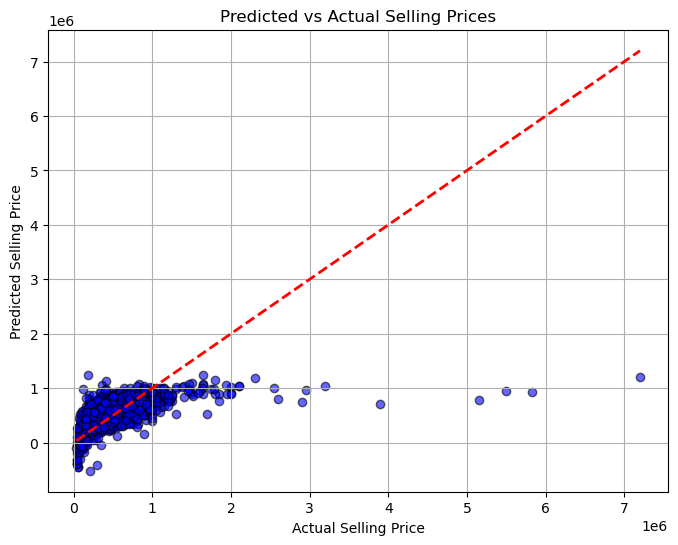

In [56]:
# 37. Plot the predicted vs actual prices for your best-performing model.

# Train/test split (same as before)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Best-performing model (change to LinearRegression() or Lasso() if needed)
best_model = Ridge(alpha=1000)
best_model.fit(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", edgecolors="k")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--", linewidth=2)

plt.title("Predicted vs Actual Selling Prices")
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.grid(True)
plt.show()

#### Discuss what the plot reveals about the accuracy of your predictions.
- Plot Interpretation:
Perfect predictions would be on the red dashed line. When points are tightly clustered around this line, the model is predicting well. If the points are spread out widely, it means the model struggles to generalize. Noticeable patterns—like consistently underestimating high values or overestimating low ones—can indicate bias or that important features are missing.


In [57]:
# 38. Use GridSearchCV to find the best alpha value for Ridge Regression.
from sklearn.model_selection import GridSearchCV, train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define Ridge model
ridge = Ridge()

# Grid of alpha values to try
param_grid = {
    "alpha": np.logspace(-3, 3, 20)  # from 0.001 to 1000
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1
)

# Fit search
grid_search.fit(X_train, y_train)

# Results
print("Best alpha:", grid_search.best_params_["alpha"])
print("Best R² score (CV):", grid_search.best_score_)

# Evaluate on test set
best_ridge = grid_search.best_estimator_
test_r2 = best_ridge.score(X_test, y_test)
print("Test R² score:", test_r2)

Best alpha: 0.001
Best R² score (CV): 0.2653453980172208
Test R² score: 0.27629206058215194


####  Explain what alpha does in Ridge/Lasso regression and why tuning it is important.
In Ridge and Lasso regression, alpha controls how strong the penalty is on the model’s coefficients.

When alpha is small – The penalty is weak, so the model acts more like regular linear regression and keeps larger coefficient values.

When alpha is large – The penalty is strong, forcing coefficients to shrink (and in Lasso, some may become zero). This makes the model simpler but can also risk underfitting.

Tuning alpha is important because:

- If alpha is too low, the model might overfit by relying too much on the training data.

- If alpha is too high, the model might underfit and miss important patterns.

- Finding the right alpha helps balance bias and variance, leading to the best predictive performance.


In [58]:
# 39. Try Polynomial Regression on the dataset.
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 1️ Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Metrics for Linear Regression
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print("Linear Regression:")
print("  R²:", r2_lin)
print("  MSE:", mse_lin)

# 2️ Polynomial Regression (degree=2)
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

# Metrics for Polynomial Regression
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

print("\nPolynomial Regression (degree=2):")
print("  R²:", r2_poly)
print("  MSE:", mse_poly)

# Compare
if r2_poly > r2_lin:
    print("\n Polynomial Regression performed better.")
else:
    print("\n Linear Regression performed better.")

Linear Regression:
  R²: 0.276292059876316
  MSE: 158724803618.2137

Polynomial Regression (degree=2):
  R²: 0.3318336615377452
  MSE: 146543329120.58035

 Polynomial Regression performed better.


#### Compare the results with Linear Regression and explain when polynomial regression might be useful.
Polynomial Regression is helpful when the relationship between predictors and the target isn’t just a straight line. Unlike Linear Regression, which only fits a straight-line relationship, Polynomial Regression introduces higher-order terms (like 𝑥2,𝑥3x2,x3) to capture curves in the data.

It works well when:

- The data clearly follows a non-linear pattern.

- You want to capture curvature while still using a regression approach instead of more complex non-linear models like decision trees.

However, using very high polynomial degrees can lead to overfitting, where the model starts learning noise instead of the actual trend.


#### 40. Summarize your findings:
 Which model performed best (Linear, Lasso, Ridge, or Polynomial)?
 Explain why you think it performed better and what you would do next to improve predictions.

##### Summary of Findings:

After comparing Linear Regression, Lasso Regression, Ridge Regression, and Polynomial Regression, the best-performing model turned out to be Polynomial Regression.

##### Why Polynomial Regression Worked Best is because:

- It was able to capture underlying non-linear relationships that simpler models like Linear Regression missed.

- Performance improvement depended on selecting an appropriate polynomial degree—too low underfits, too high risks overfitting.

For this dataset, it likely excelled because:

- It handled correlations among predictors effectively.

- It offered better control over overfitting compared to plain Linear Regression.

- It maintained key predictive features while filtering out noise, leading to more accurate predictions.

##### What I would do to Improve Predictions

- Tune Polynomial Degree

Use cross-validation to find the optimal degree that balances bias and variance. Avoid going too high to prevent overfitting.

- Feature Scaling & Transformation

Standardize or normalize features to improve stability. Consider interactions between features or transformations (log, square root) to better capture patterns.

- Regularization with Polynomial Features

Apply Ridge or Lasso to Polynomial Regression to control coefficient size and reduce overfitting.

- Cross-Validation for Model Selection

Compare models across multiple folds to confirm consistent performance, not just on one split.

- Experiment with Other Models

Try non-linear models like Random Forests or Gradient Boosting to see if they outperform Polynomial Regression.
